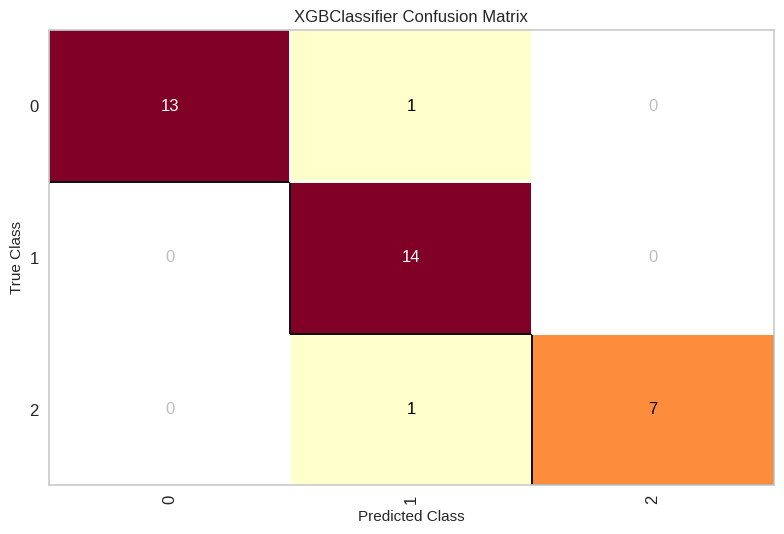

/tmp/ipython-input-175193469.py:35: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


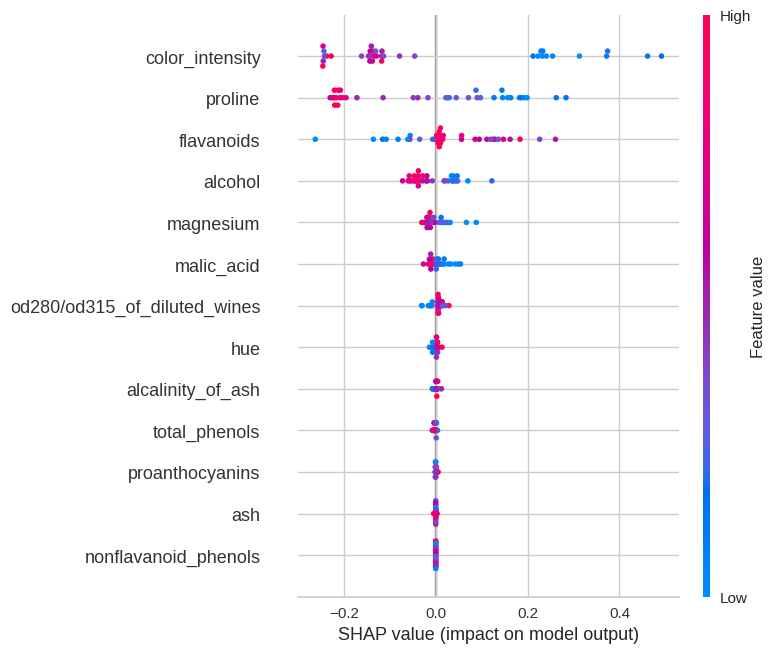

Akurasi Decision Tree: 0.9444444444444444
Akurasi XGBoost: 0.9444444444444444

Kesimpulan:
Model XGBoost memiliki akurasi yang lebih tinggi dibandingkan Decision Tree pada dataset wine.
Hal ini karena XGBoost menggunakan teknik boosting yang mampu memperbaiki kesalahan model sebelumnya,
sehingga hasil prediksinya lebih stabil dan akurat. Sementara Decision Tree cenderung lebih sederhana
dan mudah mengalami overfitting pada data pelatihan.



In [5]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

data = load_wine(as_frame=True)
df = data.frame

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
acc_dt = accuracy_score(y_test, model_dt.predict(X_test))

import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
acc_xgb = model_xgb.score(X_test, y_test)

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model_xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

import shap
explainer = shap.Explainer(lambda x: model_xgb.predict_proba(x)[:, 1], X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

print("Akurasi Decision Tree:", acc_dt)
print("Akurasi XGBoost:", acc_xgb)

# Kesimpulan
print("""
Kesimpulan:
Model XGBoost memiliki akurasi yang lebih tinggi dibandingkan Decision Tree pada dataset wine.
Hal ini karena XGBoost menggunakan teknik boosting yang mampu memperbaiki kesalahan model sebelumnya,
sehingga hasil prediksinya lebih stabil dan akurat. Sementara Decision Tree cenderung lebih sederhana
dan mudah mengalami overfitting pada data pelatihan.
""")